In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def load_and_preprocess_apys(filepath):
    """Load and preprocess the APYs DataFrame."""
    apys_df = pd.read_csv(filepath)
    apys_df.drop(labels=['APY_REWARD', 'APY_BASE', 'TVL'], axis=1, inplace=True)
    apys_df["DATE"] = pd.to_datetime(apys_df["DATE"]).dt.date
    return apys_df

def get_apy_by_month(target_date, df):
    """
    Returns the average APY for the month of the given date if it exists in the dataset.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'DATE' and 'APY' columns.
    target_date (np.datetime64): The date to search for (used to determine the month and year).

    Returns:
    float or None: The average APY value for the month if data exists, otherwise None.
    """
    df["DATE"] = pd.to_datetime(df["DATE"])
    target_year = pd.to_datetime(target_date).year
    target_month = pd.to_datetime(target_date).month

    monthly_data = df[(df["DATE"].dt.year == target_year) & (df["DATE"].dt.month == target_month)]
    return monthly_data["APY"].mean() if not monthly_data.empty else df["APY"].mean()

def calcular_rentabilidade(valor, data, type='circulana', apys_df=None):
    """
    Calculates the return based on the average APY for the month of the given date.

    Parameters:
    valor (float): The initial investment value.
    data (np.datetime64): The date to determine the month and year for APY calculation.
    type (str): The type of calculation (default is 'circulana').
    apys_df (pd.DataFrame): DataFrame containing APY data.

    Returns:
    float: The calculated return based on the average APY for the month.
    """
    if type == 'circulana':
        apy = get_apy_by_month(data, apys_df)
        if apy is not None:
            apym = (1 + apy / 100) ** (1/12) - 1
            return valor * (1 + apym)
        else:
            return valor * (1 + 0.007)
    else:
        return valor

In [6]:
def load_and_preprocess_apys(filepath):
    """Load and preprocess the APYs DataFrame."""
    apys_df = pd.read_csv(filepath)
    apys_df.drop(labels=['APY_REWARD', 'APY_BASE', 'TVL'], axis=1, inplace=True)
    apys_df["DATE"] = pd.to_datetime(apys_df["DATE"]).dt.date
    return apys_df

In [53]:
import json
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2.credentials import Credentials
from google.oauth2 import service_account
from googleapiclient.discovery import build

SCOPES = ["https://www.googleapis.com/auth/drive"]

creds = service_account.Credentials.from_service_account_info(json.loads(credentials), scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=creds)

def get_folder_id(drive_service, folder_name):
    # Generated by Copilot
    query = f"name='{folder_name}' and mimeType='application/vnd.google-apps.folder'"
    results = drive_service.files().list(
        q=query,
        fields="files(id, name)"
    ).execute()
    folders = results.get('files', [])
    if not folders:
        print(f"Pasta '{folder_name}' não encontrada.")
        return None
    return folders[0]['id']



In [64]:
def fetch_file_from_google_drive(drive_service, file_name, destination, folder_id=None):
    query = f"name='{file_name}'"
    if folder_id:
        query += f" and '{folder_id}' in parents"
    results = drive_service.files().list(
        q=query,
        fields="files(id, name)"
    ).execute()
    items = results.get('files', [])
    
    if not items:
        print("Arquivo não encontrado.")
        return False

    file_id = items[0]['id']
    request = drive_service.files().get_media(fileId=file_id)
    fh = io.FileIO(destination, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while not done:
        status, done = downloader.next_chunk()
        print(f"Download {int(status.progress() * 100)}% concluído.")


In [67]:
file_name = 'FIPE-GRUPO-655-FIPE.csv'
folder_id = get_folder_id(drive_service, "Base_simulacao")
if not folder_id:
    print("Não foi possível encontrar a pasta Base_simulacao.")
else:
    sucesso = fetch_file_from_google_drive(drive_service, file_name, file_name, folder_id=folder_id)

Download 100% concluído.


In [59]:
apys_df = load_and_preprocess_apys('apys_aave_v2_USDC.csv')

In [60]:
var = get_apy_by_month(pd.to_datetime('2024-03-05'), apys_df)

In [61]:
apym = (1 + var / 100) ** (1/12) - 1
apym

np.float64(0.008465045053370535)

In [15]:
60000 * (1 + apym)

np.float64(60507.902703202235)

In [6]:
get_apy_by_month(pd.to_datetime('2024-03-05'), apys_df)

np.float64(10.64459258064516)

In [11]:
df = pd.read_csv('santander_cotas_pre_grupo_md_cota655_202502211443.csv')
df.head()

/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_902/2548267552.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('santander_cotas_pre_grupo_md_cota655_202502211443.csv')


,id_quotas_santander,cd_grupo,cd_cota,nr_contrato,vl_devolver,vl_bem_atual,cd_produto,pc_fc_pago,dt_canc,dt_venda,...,vl_lance_embutido,vl_bem_corrigido,vl_total_contrato,vl_bem_entregue,vl_bem_a_entregar,pc_seguro,vl_lance_proprio,qt_pc_atraso,pz_comercializacao,qt_pc_lance
0,7642638,655,367,30429261,223.10,24670.93,AUTO,1.1303,2020-04-01 00:00:00.000,2020-03-17 00:00:00.000,...,NaN,0.0,28679.96,0.0,0.0,0.05,NaN,0.0,72.0,0.0
1,7642639,655,368,30429268,223.10,24670.93,AUTO,1.1303,2020-04-01 00:00:00.000,2020-03-17 00:00:00.000,...,NaN,0.0,28679.96,0.0,0.0,0.05,NaN,0.0,72.0,0.0
2,7642640,655,369,30429882,2208.46,24670.93,AUTO,11.1897,2021-02-22 00:00:00.000,2020-03-17 00:00:00.000,...,NaN,0.0,28679.96,0.0,0.0,0.05,NaN,0.0,72.0,0.0
3,7642641,655,370,30430876,5505.25,24872.50,AUTO,27.6673,2022-06-04 00:00:00.000,2020-03-17 00:00:00.000,...,NaN,0.0,28914.28,0.0,0.0,0.00,NaN,0.0,72.0,0.0
4,7642642,655,374,30433238,137.06,24670.93,AUTO,0.6946,2020-09-11 00:00:00.000,2020-03-17 00:00:00.000,...,NaN,0.0,28889.66,0.0,0.0,0.06,NaN,0.0,72.0,0.0


In [12]:
df.columns

Index(['id_quotas_santander', 'cd_grupo', 'cd_cota', 'nr_contrato',
       'vl_devolver', 'vl_bem_atual', 'cd_produto', 'pc_fc_pago', 'dt_canc',
       'dt_venda', 'pz_restante_grupo', 'qt_parcela_a_pagar',
       'nm_situ_entrega_bem', 'pc_fr_pago', 'pc_tx_adm', 'pc_tx_pago',
       'pz_contratado', 'qt_parcela_paga', 'pc_fundo_reserva',
       'pz_decorrido_grupo', 'is_processed', 'created_at', 'data_info',
       'cd_versao_cota', 'cd_tipo_pessoa', 'dt_entrega_bem', 'dt_contemplacao',
       'vl_lance_embutido', 'vl_bem_corrigido', 'vl_total_contrato',
       'vl_bem_entregue', 'vl_bem_a_entregar', 'pc_seguro', 'vl_lance_proprio',
       'qt_pc_atraso', 'pz_comercializacao', 'qt_pc_lance'],
      dtype='object')

In [ ]:
col_name = df.columns[25]  # Get the column name
df[col_name].dtype  # Check its dtype


dtype('O')

In [2]:
import pandas as pd
df = pd.read_csv('santander_cotas_pre_grupo_md_cota655_202502211443.csv')
df.drop(columns=['id_quotas_santander', 'cd_grupo', 'cd_cota', 'cd_produto', 'nm_situ_entrega_bem', 'created_at', 'is_processed', 'cd_versao_cota', 'cd_tipo_pessoa', 'pz_comercializacao', 'vl_lance_proprio'], inplace=True)
prazo_comercializacao = 72
rename_map = {
    "pc_fc_pago": "FC_paid_%",
    "pc_fundo_reserva": "FR_%",
    "pc_fr_pago": "FR_paid_%",
    "pc_tx_adm": "TX_adm_%",
    "pc_tx_pago": "TX_paid_%",
    "pc_seguro": "Seguro_%",
    # Add any other mappings as needed:
    "nr_contrato": "id",
    "vl_bem_atual": "vl_bem",
    "pz_restante_grupo": "remaining_period",
    "qt_parcela_a_pagar": "parc_to_pay",
    "pz_contratado": "contracted_period",
    "qt_parcela_paga": "parc_paid",
    "pz_decorrido_grupo": "T_decorrido",
    "dt_entrega_bem": "dt_entrega",
    "vl_lance_embutido": "embedded_bid_vl",
    "vl_bem_corrigido": "bem_corrig_vl",
    "vl_total_contrato": "total_contract_vl",
    "vl_lance_proprio": "own_bid_vl",
    "qt_pc_atraso": "qt_parc_atraso",
    "qt_pc_lance": "qt_parc_lance"
}

df = df.rename(columns=rename_map)
df['id'] = df['id'].astype(int)
df['dt_canc'] = pd.to_datetime(df['dt_canc']).dt.date
df['dt_contemplacao'] = pd.to_datetime(df['dt_contemplacao']).dt.date
df['data_info'] = pd.to_datetime(df['data_info']).dt.date
df['dt_entrega'] = pd.to_datetime(df['dt_entrega']).dt.date
#df = df[:1000]

/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_8306/766156503.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('santander_cotas_pre_grupo_md_cota655_202502211443.csv')


In [17]:
df_canceled = df[df['dt_canc'].notna()]
unique_ids_with_dt_canc = df_canceled['id'].unique()
num_unique_ids_with_dt_canc = len(unique_ids_with_dt_canc)

In [18]:
df['Seguro_%']

0        0.05
1        0.05
2        0.05
3        0.00
4        0.06
         ... 
73778    0.05
73779    0.00
73780    0.00
73781    0.06
73782    0.05
Name: Seguro_%, Length: 73783, dtype: float64

In [21]:
df

,id,vl_devolver,vl_bem,FC_paid_%,dt_canc,dt_venda,remaining_period,parc_to_pay,FR_paid_%,TX_adm_%,...,dt_entrega,dt_contemplacao,embedded_bid_vl,bem_corrig_vl,total_contract_vl,vl_bem_entregue,vl_bem_a_entregar,Seguro_%,qt_parc_atraso,qt_parc_lance
0,30429261,223.10,24670.93,1.1303,2020-04-01,2020-03-17 00:00:00.000,18,71,0.0489,12.75,...,NaT,NaT,NaN,0.0,28679.96,0.0,0.0,0.05,0.0,0.0
1,30429268,223.10,24670.93,1.1303,2020-04-01,2020-03-17 00:00:00.000,18,71,0.0489,12.75,...,NaT,NaT,NaN,0.0,28679.96,0.0,0.0,0.05,0.0,0.0
2,30429882,2208.46,24670.93,11.1897,2021-02-22,2020-03-17 00:00:00.000,18,62,0.4844,12.75,...,NaT,NaT,NaN,0.0,28679.96,0.0,0.0,0.05,0.0,0.0
3,30430876,5505.25,24872.50,27.6673,2022-06-04,2020-03-17 00:00:00.000,18,50,1.0596,12.75,...,NaT,NaT,NaN,0.0,28914.28,0.0,0.0,0.00,0.0,0.0
4,30433238,137.06,24670.93,0.6946,2020-09-11,2020-03-17 00:00:00.000,18,71,0.0488,13.60,...,NaT,NaT,NaN,0.0,28889.66,0.0,0.0,0.06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73778,30441445,5322.11,32179.37,20.6737,2022-01-05,2020-04-09 00:00:00.000,23,55,0.8249,12.75,...,NaT,NaT,NaN,0.0,37408.52,0.0,0.0,0.05,0.0,0.0
73779,30441452,4975.83,24497.50,25.3894,2022-12-06,2020-04-09 00:00:00.000,23,43,1.3885,13.60,...,NaT,NaT,NaN,0.0,28686.57,0.0,0.0,0.00,0.0,0.0
73780,30441457,3762.43,24497.50,19.1980,2022-07-12,2020-04-09 00:00:00.000,23,49,1.0955,13.60,...,NaT,NaT,NaN,0.0,28686.57,0.0,0.0,0.00,0.0,0.0
73781,30441466,178.99,32179.37,0.6952,2020-09-11,2020-04-09 00:00:00.000,23,71,0.0488,13.60,...,NaT,NaT,NaN,0.0,37682.04,0.0,0.0,0.06,0.0,0.0


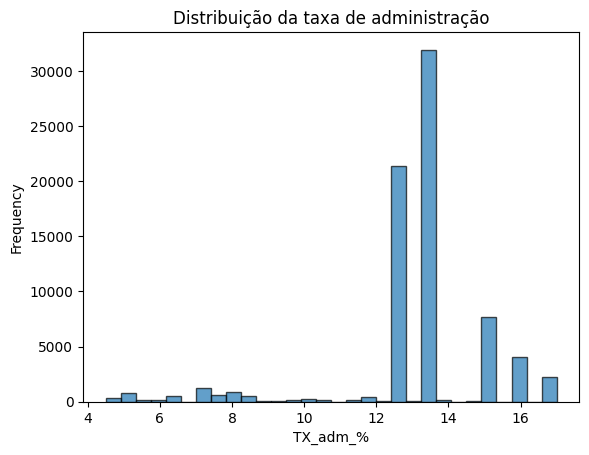

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of TX_adm_%
plt.figure(figsize=(10, 6))
plt.hist(df['TX_adm_%'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Taxa administração (%)')
plt.ylabel('Frequência')
plt.title('Distribuição da taxa de administração')
plt.show()

In [17]:
df['id'].unique().shape[0]

1000

In [18]:
unique_ids_with_dt_canc = df[df['dt_canc'].notna()]['id'].unique()
num_unique_ids_with_dt_canc = len(unique_ids_with_dt_canc)
print(num_unique_ids_with_dt_canc)

997


In [19]:
df_canceled = df[df['dt_canc'].notna()]
df_canceled = df_canceled.loc[df_canceled.groupby('id')['data_info'].idxmax()]

In [29]:
import pandas as pd

# Filter out rows where 'dt_contemplacao' is NaT
df_filtered = df[df['dt_contemplacao'].notna()].copy()  # Ensure df_filtered is a new DataFrame

# Ensure 'dt_contemplacao' is in datetime format
df_filtered.loc[:, 'dt_contemplacao'] = pd.to_datetime(df_filtered['dt_contemplacao'])

# Extract year and month from 'dt_contemplacao' using .loc[]
df_filtered.loc[:, 'contemplation_year'] = df_filtered['dt_contemplacao'].dt.year
df_filtered.loc[:, 'contemplation_month'] = df_filtered['dt_contemplacao'].dt.month

# Sort the dataframe by contemplation year and month
df_sorted = df_filtered.sort_values(by=['contemplation_year', 'contemplation_month'])

# Drop the temporary columns if not needed
df_sorted = df_sorted.drop(columns=['contemplation_year', 'contemplation_month'])

df_sorted

,id,vl_devolver,vl_bem,FC_paid_%,dt_canc,dt_venda,remaining_period,parc_to_pay,FR_paid_%,TX_adm_%,...,dt_entrega,dt_contemplacao,embedded_bid_vl,bem_corrig_vl,total_contract_vl,vl_bem_entregue,vl_bem_a_entregar,Seguro_%,qt_parc_atraso,qt_parc_lance
7068,30436158,0.00,33061.11,100.0000,NaT,2020-03-20 00:00:00.000,15,0,3.4988,12.75,...,NaT,2020-04-09,0.00,33061.11,38433.54,0.00,28675.49,0.00,0.0,0.0
18400,30436158,0.00,33061.11,100.0000,NaT,2020-03-20 00:00:00.000,57,0,3.4988,12.75,...,NaT,2020-04-09,0.00,28608.27,38433.54,0.00,28641.65,0.00,0.0,0.0
24229,30436158,0.00,33061.11,100.0000,NaT,2020-03-20 00:00:00.000,15,0,3.4988,12.75,...,NaT,2020-04-09,0.00,28608.27,38433.54,0.00,28641.65,0.00,0.0,0.0
27216,30436158,0.00,33061.11,100.0000,NaT,2020-03-20 00:00:00.000,15,0,3.4988,12.75,...,NaT,2020-04-09,0.00,33061.11,38433.54,0.00,28675.49,0.00,0.0,0.0
51132,30436158,0.00,33061.11,100.0000,NaT,2020-03-20 00:00:00.000,15,0,3.4988,12.75,...,NaT,2020-04-09,0.00,33061.11,38433.54,0.00,28675.49,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,311626,0.00,33745.50,44.0070,NaT,2024-12-20 00:00:00.000,15,14,1.5765,6.50,...,NaT,2025-07-01,10505.66,33745.50,37120.05,10505.66,23384.09,0.00,0.0,37.0
51157,30438219,2.50,33745.50,100.0074,NaT,2020-03-30 00:00:00.000,15,0,3.4996,13.60,...,NaT,2025-07-01,0.00,33745.50,39515.98,0.00,33954.96,0.06,0.0,39.0
51306,30446718,2474.52,40035.60,105.2847,NaT,2020-05-05 00:00:00.000,15,0,4.3961,13.60,...,NaT,2025-07-01,13015.82,40035.60,46881.69,13015.82,27187.49,0.00,0.0,43.0
51372,50947588,0.00,40035.60,50.5056,NaT,2024-08-11 00:00:00.000,15,14,1.8194,17.00,...,NaT,2025-07-01,13653.84,40035.60,48242.90,13653.84,26534.52,0.00,0.0,39.0


In [21]:
df_canceled = df[df['dt_canc'].notna()]
unique_ids_with_dt_canc = df_canceled['id'].unique()
unique_ids_with_dt_canc

array([30429261, 30429268, 30429882, 30430876, 30433238, 30433459,
       30434130, 30434236, 30434239, 30434240, 30434252, 30434278,
       30434281, 30434287, 30434291, 30434294, 30434296, 30434297,
       30434306, 30434312, 30434324, 30434336, 30434337, 30434341,
       30434342, 30434343, 30434344, 30434367, 30434370, 30434371,
       30434374, 30434390, 30434401, 30434402, 30434408, 30434411,
       30434423, 30434435, 30434436, 30434438, 30434453, 30434464,
       30434469, 30434470, 30434471, 30434475, 30434478, 30434480,
       30434481, 30434487, 30434496, 30434498, 30434526, 30434529,
       30434531, 30434537, 30434545, 30434553, 30434560, 30434570,
       30434573, 30434575, 30434576, 30434582, 30434607, 30434626,
       30434637, 30434638, 30434659, 30434671, 30434684, 30434688,
       30434690, 30434694, 30434701, 30434710, 30434714, 30434721,
       30434762, 30434793, 30434822, 30434840, 30434853, 30434857,
       30434878, 30434883, 30434895, 30434897, 30434908, 30428

In [6]:
rename_map = {
        "pc_fc_pago": "FC_paid_%",
        "pc_fundo_reserva": "FR_%",
        "pc_fr_pago": "FR_paid_%",
        "pc_tx_adm": "TX_adm_%",
        "pc_tx_pago": "TX_paid_%",
        "pc_seguro": "Seguro_%",
        "nr_contrato": "id",
        "vl_bem_atual": "vl_bem",
        "pz_restante_grupo": "remaining_period",
        "qt_parcela_a_pagar": "parc_to_pay",
        "pz_contratado": "contracted_period",
        "qt_parcela_paga": "parc_paid",
        "pz_decorrido_grupo": "T_decorrido",
        "dt_entrega_bem": "dt_entrega",
        "vl_lance_embutido": "embedded_bid_vl",
        "vl_bem_corrigido": "bem_corrig_vl",
        "vl_total_contrato": "total_contract_vl",
        "vl_lance_proprio": "own_bid_vl",
        "qt_pc_atraso": "qt_parc_atraso",
        "qt_pc_lance": "qt_parc_lance"
    }
df = df.rename(columns=rename_map)

df['id'] = df['id'].astype(int)
date_columns = ['dt_canc', 'dt_contemplacao', 'data_info', 'dt_entrega']
for col in date_columns:
    df[col] = pd.to_datetime(df[col]).dt.date


In [13]:
df_correction = pd.read_csv('FIPE-GRUPO-655-FIPE.csv')

In [14]:
df_correction

,bem_inicial,bem_atual,percentual_inicial,percentual_final,inicio_grupo,termino_grupo,valor_2020,valor_2021,valor_2022,valor_2023,valor_2024,valor_2025
0,20% VOYAGE 1.6 MSI,22% POLO TRACK 1.0 MPI,"20,00%","22,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"
1,20% VOYAGE 1.6 MSI,22% POLO TRACK 1.0 MPI,"20,00%","22,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"
2,20% VOYAGE 1.0 MANUAL 4P,22% Polo Track 1.0 MPI Manual,"20,00%","22,00%",2020-05-19,2026-05-19,"44.709,00","55.232,00","64.119,00","73.603,00","78.417,00","89.373,00"
3,20% VOYAGE 1.6 MSI,22% POLO TRACK 1.0 MPI - PLANO FLEX,"20,00%","22,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"
4,25% YARIS HATCHBACK XL CVT,25% YARIS HATCHBACK XL CVT,"25,00%","25,00%",2020-05-19,2026-05-19,"61.568,00","71.377,00","88.721,00","88.624,00","88.854,00","106.712,00"
5,25% YARIS XL CVT,25% YARIS XL CVT,"25,00%","25,00%",2020-05-19,2026-05-19,"61.568,00","71.377,00","88.721,00","88.624,00","88.854,00","106.712,00"
6,25% YARIS XL CVT,25% YARIS XL CVT,"25,00%","25,00%",2020-05-19,2026-05-19,"61.568,00","71.377,00","88.721,00","88.624,00","88.854,00","106.712,00"
7,25% YARIS XL CVT - PLANO FLEX,25% YARIS XL CVT - PLANO FLEX,"25,00%","25,00%",2020-05-19,2026-05-19,"61.568,00","71.377,00","88.721,00","88.624,00","88.854,00","106.712,00"
8,40% VOYAGE 1.6 MSI,44% POLO TRACK 1.0 MPI,"40,00%","44,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"
9,40% VOYAGE 1.6 MSI,44% POLO TRACK 1.0 MPI - PLANO FLEX,"40,00%","44,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"


In [35]:
df_correction = pd.read_csv('FIPE-GRUPO-655-FIPE.csv')
df_correction = df_correction.replace({',': '.'}, regex=True)
for year in range(2020, 2026):
    df_correction[f'valor_{year}'] = df_correction[f'valor_{year}'].astype(str).apply(lambda x: float(x.replace('.', '').replace(',', '.')))
apys_df = load_and_preprocess_apys("apys.csv")

In [39]:
def get_corrected_value(vl_bem_atual, year, month, data_entrada):
    item = df_correction[df_correction[f'valor_{year}'] == str(vl_bem_atual)]
    if item.empty:
        closest_value = df_correction[f'valor_{year}'].sub(vl_bem_atual).abs().idxmin()
        item = df_correction.loc[closest_value]
    data_entrada = pd.to_datetime(data_entrada)
    data_corrigida = data_entrada + pd.DateOffset(months=month)
    year_corrigido = data_corrigida.year
    valor_corrigido = item[f'valor_{year_corrigido}']
    return valor_corrigido.values[0] if isinstance(valor_corrigido, pd.Series) else valor_corrigido


In [40]:
type(df[df['id'] == 30428875]['vl_bem'])

pandas.core.series.Series

In [41]:
get_corrected_value(38986.75, 2022, 2, '2024-10-09')

np.float64(6228000.0)

In [23]:
df_correction = pd.read_csv('FIPE-GRUPO-655-FIPE.csv')
apys_df = load_and_preprocess_apys("apys.csv")

In [24]:
df_correction.head()

,bem_inicial,bem_atual,percentual_inicial,percentual_final,inicio_grupo,termino_grupo,valor_2020,valor_2021,valor_2022,valor_2023,valor_2024,valor_2025
0,20% VOYAGE 1.6 MSI,22% POLO TRACK 1.0 MPI,"20,00%","22,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"
1,20% VOYAGE 1.6 MSI,22% POLO TRACK 1.0 MPI,"20,00%","22,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"
2,20% VOYAGE 1.0 MANUAL 4P,22% Polo Track 1.0 MPI Manual,"20,00%","22,00%",2020-05-19,2026-05-19,"44.709,00","55.232,00","64.119,00","73.603,00","78.417,00","89.373,00"
3,20% VOYAGE 1.6 MSI,22% POLO TRACK 1.0 MPI - PLANO FLEX,"20,00%","22,00%",2020-05-19,2026-05-19,"48.641,00","61.770,00","72.304,00","73.603,00","78.417,00","89.373,00"
4,25% YARIS HATCHBACK XL CVT,25% YARIS HATCHBACK XL CVT,"25,00%","25,00%",2020-05-19,2026-05-19,"61.568,00","71.377,00","88.721,00","88.624,00","88.854,00","106.712,00"


In [43]:
def get_corrected_value(vl_bem_atual, year, month, data_entrada):
    vl_bem_atual = float(vl_bem_atual)
    df_correction[f'valor_{year}'] = df_correction[f'valor_{year}'].str.replace('.', '').str.replace(',', '.').astype(float)
    item = df_correction[df_correction[f'valor_{year}'] == vl_bem_atual]
    if item.empty:
        closest_value = df_correction[f'valor_{year}'].sub(vl_bem_atual).abs().idxmin()
        item = df_correction.loc[closest_value]
    data_entrada = pd.to_datetime(data_entrada)
    data_corrigida = data_entrada + pd.DateOffset(months=month)
    year_corrigido = data_corrigida.year
    valor_corrigido = item[f'valor_{year_corrigido}']
    return valor_corrigido.values[0] if isinstance(valor_corrigido, pd.Series) else valor_corrigido


In [44]:
get_corrected_value(38986.75, 2022, 2, '2024-10-09')

'62.280,00'

In [45]:
import pandas as pd

df_correction = pd.read_csv('FIPE-GRUPO-655-FIPE.csv')

# Ensure proper float conversion at the beginning
for year in range(2020, 2026):
    df_correction[f'valor_{year}'] = (
        df_correction[f'valor_{year}']
        .astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

apys_df = load_and_preprocess_apys("apys.csv")

def get_corrected_value(vl_bem_atual, year, month, data_entrada):
    vl_bem_atual = float(vl_bem_atual)

    # Find exact match or closest value
    item = df_correction[df_correction[f'valor_{year}'] == vl_bem_atual]
    if item.empty:
        closest_index = (df_correction[f'valor_{year}'] - vl_bem_atual).abs().idxmin()
        item = df_correction.loc[[closest_index]]  # Ensure item is a DataFrame

    # Calculate new date and corresponding year
    data_entrada = pd.to_datetime(data_entrada)
    data_corrigida = data_entrada + pd.DateOffset(months=month)
    year_corrigido = data_corrigida.year

    # Retrieve corrected value and ensure it's returned as a float
    valor_corrigido = item[f'valor_{year_corrigido}'].values[0]
    return float(valor_corrigido)  # Ensure float type

# Example call
print(get_corrected_value(38986.75, 2022, 2, '2024-10-09'))


62280.0


In [ ]:
def get_corrected_value(vl_bem_atual, year, month, data_entrada):
        vl_bem_atual = float(vl_bem_atual)

        # Find exact match or closest value
        item = df_correction[df_correction[f'valor_{year}'] == vl_bem_atual]
        if item.empty:
            closest_index = (df_correction[f'valor_{year}'] - vl_bem_atual).abs().idxmin()
            item = df_correction.loc[[closest_index]]  # Ensure item is a DataFrame

        # Calculate new date and corresponding year
        data_entrada = pd.to_datetime(data_entrada)
        data_corrigida = data_entrada + pd.DateOffset(months=month)
        year_corrigido = data_corrigida.year

        # Retrieve corrected value and ensure it's returned as a float
        valor_corrigido = item[f'valor_{year_corrigido}'].values[0]
        return float(valor_corrigido)

In [ ]:
def load_and_preprocess_apys(filepath):
    """Load and preprocess the APYs DataFrame."""
    apys_df = pd.read_csv(filepath)
    apys_df.drop(labels=['APY_REWARD', 'APY_BASE', 'TVL'], axis=1, inplace=True)
    apys_df["DATE"] = pd.to_datetime(apys_df["DATE"]).dt.date
    return apys_df

def get_apy_by_month(target_date, df):
    """
    Returns the average APY for the month of the given date if it exists in the dataset.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'DATE' and 'APY' columns.
    target_date (np.datetime64): The date to search for (used to determine the month and year).

    Returns:
    float or None: The average APY value for the month if data exists, otherwise None.
    """
    df["DATE"] = pd.to_datetime(df["DATE"])
    target_year = pd.to_datetime(target_date).year
    target_month = pd.to_datetime(target_date).month

    monthly_data = df[(df["DATE"].dt.year == target_year) & (df["DATE"].dt.month == target_month)]
    return monthly_data["APY"].mean() if not monthly_data.empty else df["APY"].loc[0]

def calcular_rentabilidade(valor, data, type='circulana', apys_df=None, fc=False):
    """
    Calculates the return based on the average APY for the month of the given date.

    Parameters:
    valor (float): The initial investment value.
    data (np.datetime64): The date to determine the month and year for APY calculation.
    type (str): The type of calculation (default is 'circulana').
    apys_df (pd.DataFrame): DataFrame containing APY data.

    Returns:
    float: The calculated return based on the average APY for the month.
    """
    if type == 'circulana':
        apy = get_apy_by_month(data, apys_df)
        if apy is not None:
            apym = (1 + apy / 100) ** (1/12) - 1
            return valor * (1 + apym) if not fc else valor * (1+apym*0.7)
        else:
            return valor * (1 + 0.007)
    else:
        return valor

In [30]:
df_apys = load_and_preprocess_apys("apys.csv")
df_apys = df_apys.sort_values(by='DATE')
df_apys.head()

,APY,DATE
0,83.91300,2022-04-15
1,46.45067,2022-04-16
2,28.02722,2022-04-17
3,29.19016,2022-04-18
4,11.24849,2022-04-19


In [ ]:
def load_and_preprocess_grupo(filepath, number_elements=None):
    if number_elements:
        df = pd.read_csv(filepath, nrows=number_elements)
    else:
        df = pd.read_csv(filepath)
    rename_map = {
        "pc_fc_pago": "FC_paid_%",
        "pc_fundo_reserva": "FR_%",
        "pc_fr_pago": "FR_paid_%",
        "pc_tx_adm": "TX_adm_%",
        "pc_tx_pago": "TX_paid_%",
        "pc_seguro": "Seguro_%",
        "nr_contrato": "id",
        "vl_bem_atual": "vl_bem",
        "pz_restante_grupo": "remaining_period",
        "qt_parcela_a_pagar": "parc_to_pay",
        "pz_contratado": "contracted_period",
        "qt_parcela_paga": "parc_paid",
        "pz_decorrido_grupo": "T_decorrido",
        "dt_entrega_bem": "dt_entrega",
        "vl_lance_embutido": "embedded_bid_vl",
        "vl_bem_corrigido": "bem_corrig_vl",
        "vl_total_contrato": "total_contract_vl",
        "vl_lance_proprio": "own_bid_vl",
        "qt_pc_atraso": "qt_parc_atraso",
        "qt_pc_lance": "qt_parc_lance"
    }
    df = df.rename(columns=rename_map)
    
    df['id'] = df['id'].astype(int)
    date_columns = ['dt_canc', 'dt_contemplacao', 'data_info', 'dt_entrega']
    for col in date_columns:
        df[col] = pd.to_datetime(df[col]).dt.date
    # Ensure 'data_info' is in datetime format
    df['data_info'] = pd.to_datetime(df['data_info'])

    # Group by 'id' and get the row with the most recent 'data_info' for each group
    df_most_recent = df.loc[df.groupby('id')['data_info'].idxmax()]

    return df_most_recent

In [15]:
df_aave_v2 = pd.read_csv('apys_aave_v2_USDC.csv')
df_balancer = pd.read_csv('apys_balancer_v3_USDC.csv')
df_compound = pd.read_csv('apys_compound_USDC.csv')
df_uniswap = pd.read_csv('apys_uniswap_v3-USDC-USDT.csv')

In [16]:
df_aave_v2.head()

,APY,APY_BASE,APY_REWARD,TVL,DATE,GAS_PRICE_MED
0,1.80182,1.80182,NaN,6884855,2023-02-06T23:01:24.670Z,0.45
1,1.97735,1.97735,NaN,6413779,2023-02-07T23:01:03.756Z,0.45
2,1.73451,1.73451,NaN,8085766,2023-02-08T23:01:03.305Z,0.45
3,1.07490,1.07490,NaN,13255693,2023-02-09T23:01:04.532Z,0.45
4,1.05823,1.05823,NaN,14305773,2023-02-10T23:01:01.360Z,0.45


In [17]:
import pandas as pd
df_usd = pd.read_csv('usd-variation.csv')
df_usd

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01-1-2016,"39,593","39,593","39,593","39,593",NaN,"0,00%"
1,02-1-2016,"39,614","39,992","40,273","39,489",NaN,"-0,90%"
2,03-1-2016,"39,260","40,172","40,225","39,258",NaN,"-2,23%"
3,04-1-2016,"35,525","35,910","36,234","35,352",NaN,"-1,11%"
4,06-1-2016,"35,996","36,095","36,360","35,770",NaN,"-0,30%"
...,...,...,...,...,...,...,...
2384,31-12-2018,"38,804","38,804","38,804","38,804",NaN,"0,00%"
2385,31-12-2019,"40,190","40,197","40,198","40,194","0,00K","0,00%"
2386,31-12-2020,"51,937","51,937","51,937","51,937",NaN,"0,00%"
2387,31-12-2021,"55,703","55,715","55,717","55,711",NaN,"-0,01%"


In [18]:
df_usd.drop(columns=['Último', 'Máxima', 'Mínima', 'Var%', 'Vol.'], inplace=True)
df_usd.columns = ['date', 'usd']
df_usd.head()

,date,usd
0,01-1-2016,"39,593"
1,02-1-2016,"39,992"
2,03-1-2016,"40,172"
3,04-1-2016,"35,910"
4,06-1-2016,"36,095"


In [19]:
df_usd['date'] = pd.to_datetime(df_usd['date'], format='%d-%m-%Y', dayfirst=True)

In [20]:
df_usd['usd'] = df_usd['usd'].str.replace(',', '.').astype(float)
df_usd['usd'] = df_usd['usd'].apply(lambda x: x/10)
df_usd.head()

,date,usd
0,2016-01-01,3.9593
1,2016-01-02,3.9992
2,2016-01-03,4.0172
3,2016-01-04,3.5910
4,2016-01-06,3.6095


In [ ]:
def correct_real(initial_date, initial_amount=1.0, final_date=None, correction_type='daily'):
    """
    Calculates the corrected value of an initial investment in BRL over time based on USD variation.

    Parameters:
    - initial_date (str or datetime): The start date of the investment.
    - initial_amount (float): The initial amount in BRL.
    - final_date (str or datetime, optional): The end date of the investment.
    - correction_type (str): 'daily' for daily correction, 'monthly' for monthly correction (same day each month).

    Returns:
    - Final corrected value (float)
    - Final date reached (datetime)
    """

    # Convert input dates to datetime
    initial_date = pd.to_datetime(initial_date, format='%d-%m-%Y')
    if final_date:
        final_date = pd.to_datetime(final_date, format='%d-%m-%Y')

    # Ensure we start from the exact given date
    df_filtered = df_usd[df_usd['date'] >= initial_date].copy()
    
    if df_filtered.empty:
        raise ValueError("No data available for the given date. Choose an earlier date.")

    # Start with initial amount
    amount = initial_amount

    if correction_type == 'daily':
        if final_date:
            df_final = df_usd[df_usd['date'] <= final_date].copy()
            if df_final.empty:
                raise ValueError("No data available for the given final date. Choose a later date.")
            final_usd = df_final.iloc[-1]['usd']
        else:
            final_usd = df_filtered.iloc[-1]['usd']
        current_amount = amount * (final_usd / df_filtered.iloc[0]['usd'])

    elif correction_type == 'monthly':
        if final_date:
            final_year = final_date.year
            final_month = final_date.month
            df_final = df_usd[(df_usd['date'].dt.year == final_year) & (df_usd['date'].dt.month == final_month)]
            if df_final.empty:
                raise ValueError("No data available for the given final date. Choose a later date.")
            final_usd = df_final['usd'].mean()
        else:
            final_usd = df_filtered['usd'].mean()
        current_amount = amount * (final_usd / df_filtered.iloc[0]['usd'])

    return round(current_amount, 4)

In [16]:
final_value_daily = correct_real('01-1-2016', initial_amount=1.0, correction_type='daily')
final_value_monthly = correct_real('01-1-2016', initial_amount=1.0, correction_type='monthly')

print(f"Final value (Daily Correction): {final_value_daily}")
print(f"Final value (Monthly Correction): {final_value_monthly}")

Final value (Daily Correction): (np.float64(1.4639), Timestamp('2025-12-02 00:00:00'))
Final value (Monthly Correction): (np.float64(0.9149), Timestamp('2025-12-31 00:00:00'))


In [11]:
initial_date = '01-01-2016'
initial_amount = 1.0

In [12]:
initial_date = pd.to_datetime(initial_date, format='%d-%m-%Y')

# Filter data from the initial date onward
df_filtered = df_usd[df_usd['Date'] >= initial_date].copy()

if df_filtered.empty:
    raise ValueError("No data available for the given date. Choose an earlier date.")

# Start with initial amount
amount = initial_amount
last_month = None


In [ ]:
for _, row in df_filtered.iterrows():
    if pd.isna(row['Var']):  # Skip NaN variations
        continue
    amount *= (1 + row['Var'])  # Apply daily percentage change
    